In [68]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [69]:
df=pd.read_csv("/content/car data.csv")

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [71]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [72]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [73]:
df.isnull().sum()   #here we checkd null values

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [74]:
"""In this data Fuel_Type,Seller_Type,Transmission have names in 
the dataset but we want this in the form of 0 and 1
this names are called objects or Categorical data so we check those 3 colums
value counts
"""     
print(df.Fuel_Type.value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [75]:
# Here we replaced names into values of 0 and 1
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2 }},inplace=True)
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [43]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [44]:
# we dont want car name here and we want predict selling price so we have dropped columns
X=df.drop(['Car_Name','Selling_Price'],axis=1)   
y=df['Selling_Price']

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

In [76]:
#Deploy Linear Regression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
pred


array([10.47979764,  0.75690882,  4.2746044 ,  5.09587542,  9.96280947,
        4.23790889,  7.48303996,  7.54347861,  0.2085049 ,  5.16652031,
        6.1862969 ,  6.36138011,  2.34247678,  7.69197   ,  1.9609899 ,
        1.7502047 ,  2.06459223,  1.89250839,  9.48516668,  4.2710413 ,
        1.51968495,  9.27695508,  1.49937834,  9.76123747,  0.86381105,
        8.23607772,  1.57709172, -3.19130995,  4.24596196,  2.13058921,
        3.64381787,  3.75052014,  5.57701312,  7.70995905, -1.85425479,
        6.97992069,  8.3669153 ,  5.80846789,  6.13729071,  6.44974101,
       16.19369437,  2.10928552,  1.09210522, -0.40818538,  6.99617167,
        6.76553097,  1.03168105,  7.00226734, 14.36455016,  3.04779912,
        8.20255775, -0.84148058,  8.90907148,  1.18954833,  2.15300849,
       -0.77210195,  0.72929015, 10.10503885, -0.41744747, -2.36684675,
       10.19768136,  6.76474884,  0.9962839 ,  4.35604977,  0.06839175,
        3.75593125,  2.83329902,  1.47321834,  0.45936063,  1.64

In [77]:
# Accuracy of LinearRegression
Testnacc=lr.score(X_test,y_test)
print("Accuracy is",Testnacc)

Accuracy is 0.8191909743726024


In [78]:
#calculate R2 Score
predr2=metrics.r2_score(y_test,pred)
predr2

0.8191909743726024

Text(0, 0.5, 'Predicted price')

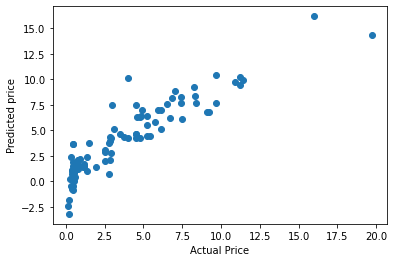

In [79]:
#plot the Scatter plot for Linear Regression
plt.scatter(y_test,pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")

In [80]:
# Build Lasso Model
ls=Lasso()
ls.fit(X_train,y_train)
predls=ls.predict(X_test)
predls

array([ 9.81343368,  1.5033095 ,  4.40863658,  3.22631442,  8.97220825,
        4.33936308,  3.75917149,  5.741595  ,  0.97067525,  5.32693683,
        6.52171038,  4.47778994,  1.37022364,  8.30648347,  2.05025393,
        2.41364163,  2.68057521,  2.48241014,  8.07610473,  4.2873412 ,
        2.38383207,  7.94128992,  2.13428159,  8.63924625,  1.61094178,
        6.57337325,  2.2334242 , -1.21946307,  4.10659569,  2.18639236,
        2.53629468,  3.65845602,  5.68319581,  8.32373509, -0.84255205,
        5.32991548,  6.57907555,  5.83367386,  6.47471312,  4.84846198,
       15.57926814,  2.72343637,  1.77069628,  0.48816013,  5.27401168,
        6.96641129,  1.72979024,  5.35134606, 13.93098795,  2.9689314 ,
        6.54122738,  0.09015219, 10.00198795,  1.8906533 ,  2.77294083,
        0.11426275,  1.45921384, 10.05399024,  0.46981043, -1.32673612,
        9.02213899,  6.96566122,  2.86313791,  4.10659977,  0.91252806,
        3.08568442,  2.71399444,  2.22423214,  1.28035881,  2.30

In [81]:
lassoScore=ls.score(X_test,y_test)
print("The accuracy is",lassoScore)

The accuracy is 0.8427899617405931


In [82]:
#calculate R2 score for Lasso 
lassor2=metrics.r2_score(y_test,predls)
print(lassor2)


0.842789961740593


Text(0, 0.5, 'Predicted Price')

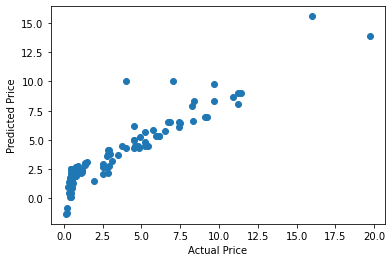

In [83]:
#plot the scatter plot for lasso
plt.scatter(y_test,predls)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")